# 5分钟接入whisper语音识别教程

## 本节内容：
- whisper介绍&原理讲解
- whisper实操

## 一、whisper（openai)

官网：https://github.com/openai/whisper

Whisper 是一种通用的语音识别模型。它是在包含各种音频的大型数据集上训练的，也是一个可以执行多语言语音识别、语音翻译和语言识别的多任务模型。

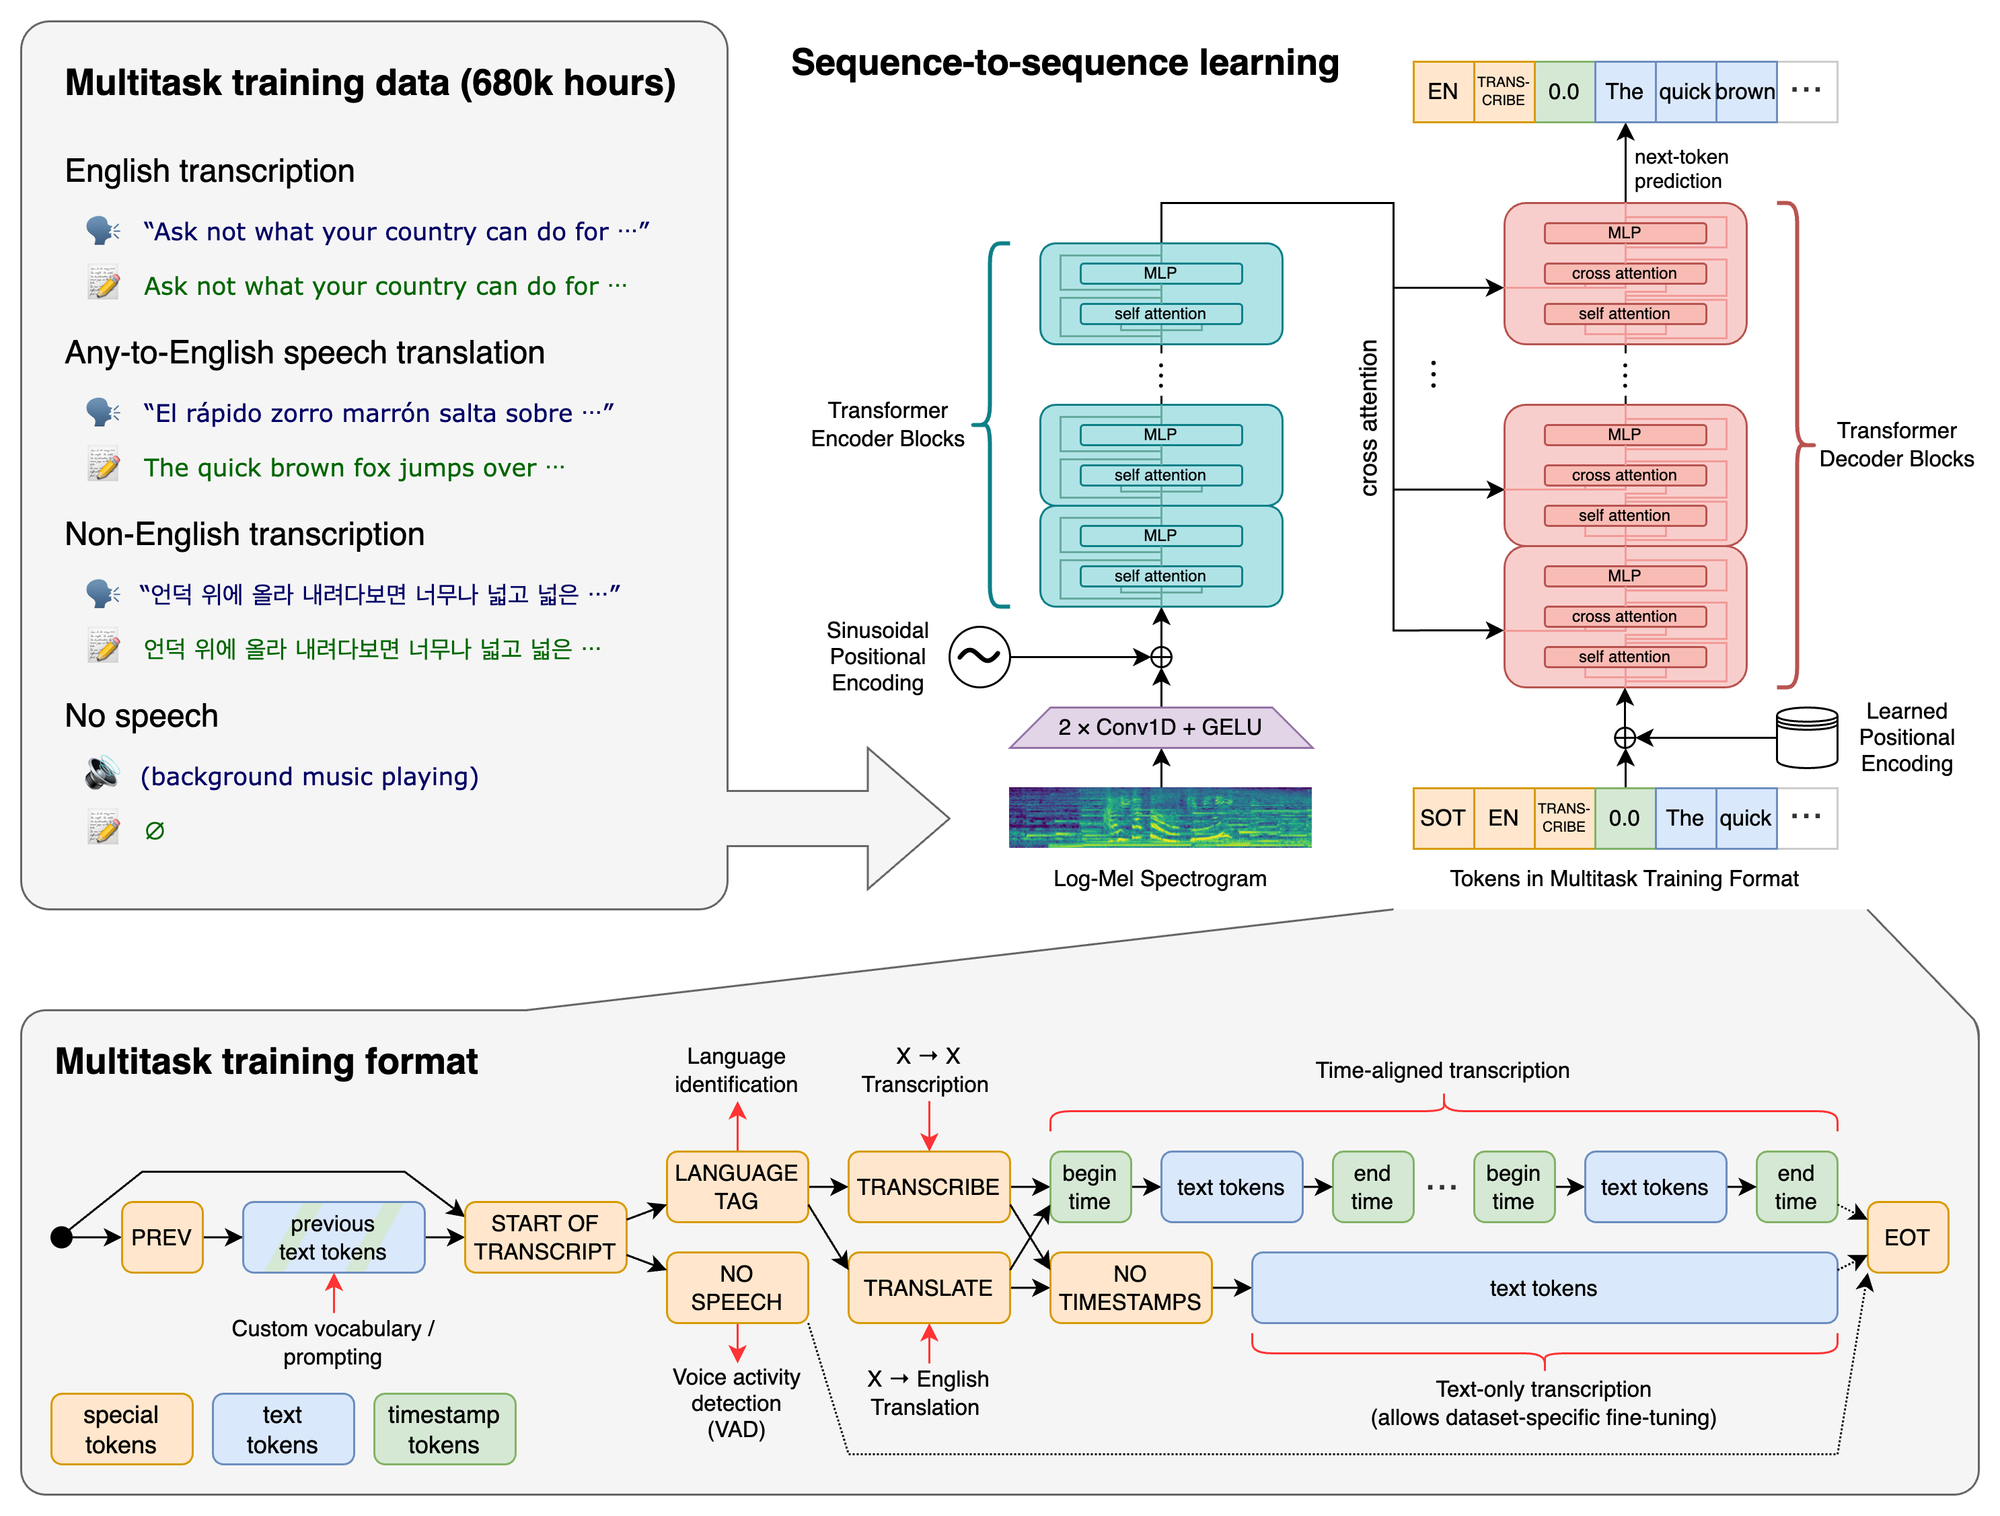

Transformer 序列到序列模型针对各种语音处理任务进行训练，包括多语言语音识别、语音翻译、口语识别和语音活动检测。 这些任务共同表示为由解码器预测的一系列标记，允许单个模型取代传统语音处理管道的多个阶段。 多任务训练格式使用一组特殊标记作为任务说明符或分类目标

## 理论
- Whisper 是一种自动语音识别 (ASR) 系统，使用从网络收集的 680,000 小时多语言和多任务监督数据进行训练。 我们表明，使用如此庞大且多样化的数据集可以提高对口音、背景噪音和技术语言的鲁棒性。 此外，它还支持多种语言的转录，以及将这些语言翻译成英语。 我们开源模型和推理代码，作为构建有用应用程序和进一步研究稳健语音处理的基础。

- Whisper 架构是一种简单的端到端方法，实现为编码器-解码器 Transformer。 输入音频被分成 30 秒的块，转换成 log-Mel 频谱图，然后传递到编码器。 解码器经过训练以预测相应的文本标题，并与特殊标记混合使用，这些标记指示单个模型执行语言识别、短语级时间戳、多语言语音转录和英语语音翻译等任务。

- 其他现有方法经常使用更小、配对更紧密的音频文本训练数据集，或使用广泛但无监督的音频预训练。 因为 Whisper 是在一个庞大而多样化的数据集上训练的，并且没有针对任何特定的数据集进行微调，所以它没有击败专门研究 LibriSpeech 性能的模型，这是语音识别领域著名的竞争基准。 然而，当我们在许多不同的数据集上测量 Whisper 的零样本性能时，我们发现它更加稳健，并且比那些模型少 50% 的错误。

- Whisper 大约三分之一的音频数据集是非英语的，它交替被赋予以原始语言转录或翻译成英语的任务。 我们发现这种方法在学习语音到文本翻译方面特别有效，并且在 CoVoST2 到英语翻译零样本上优于监督式 SOTA。

## 模型
### 模型大小

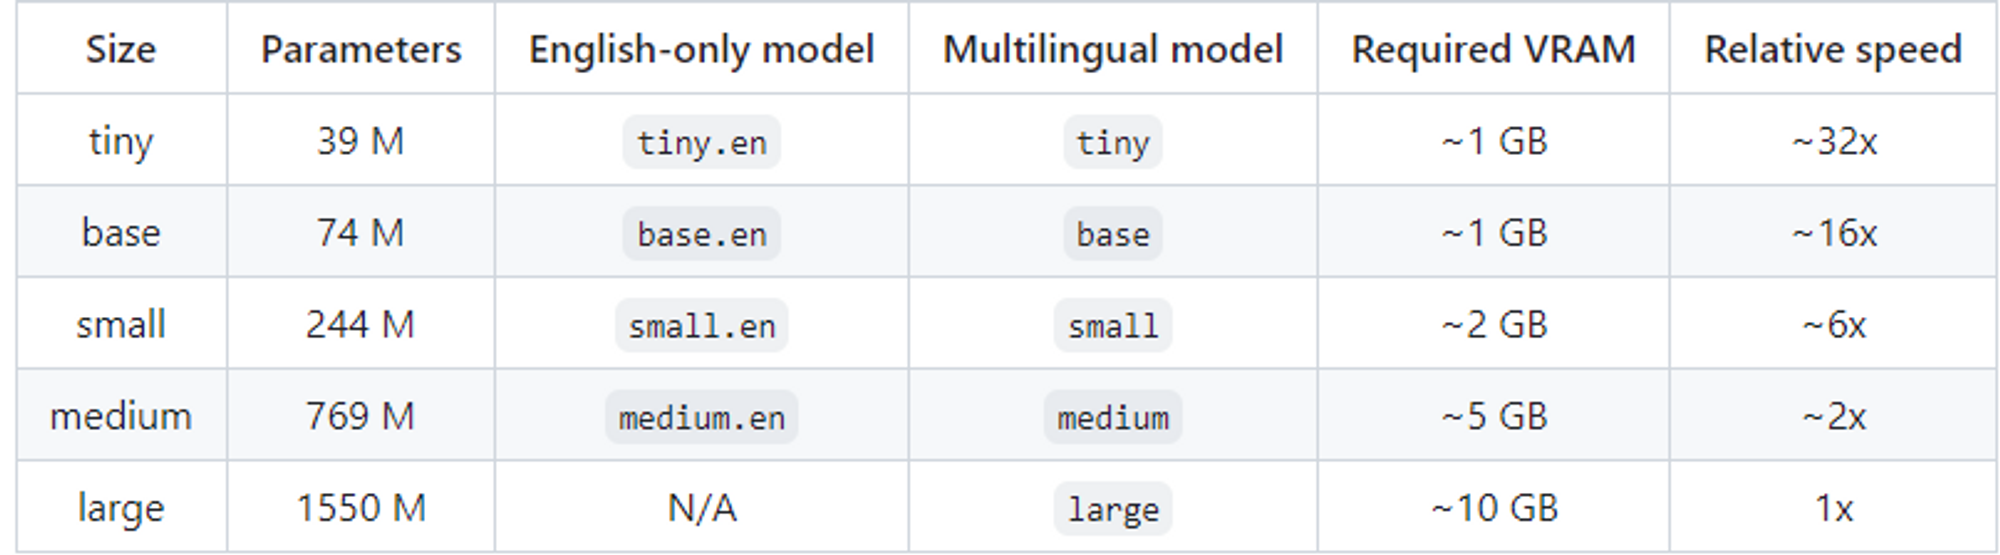

### whisper效果


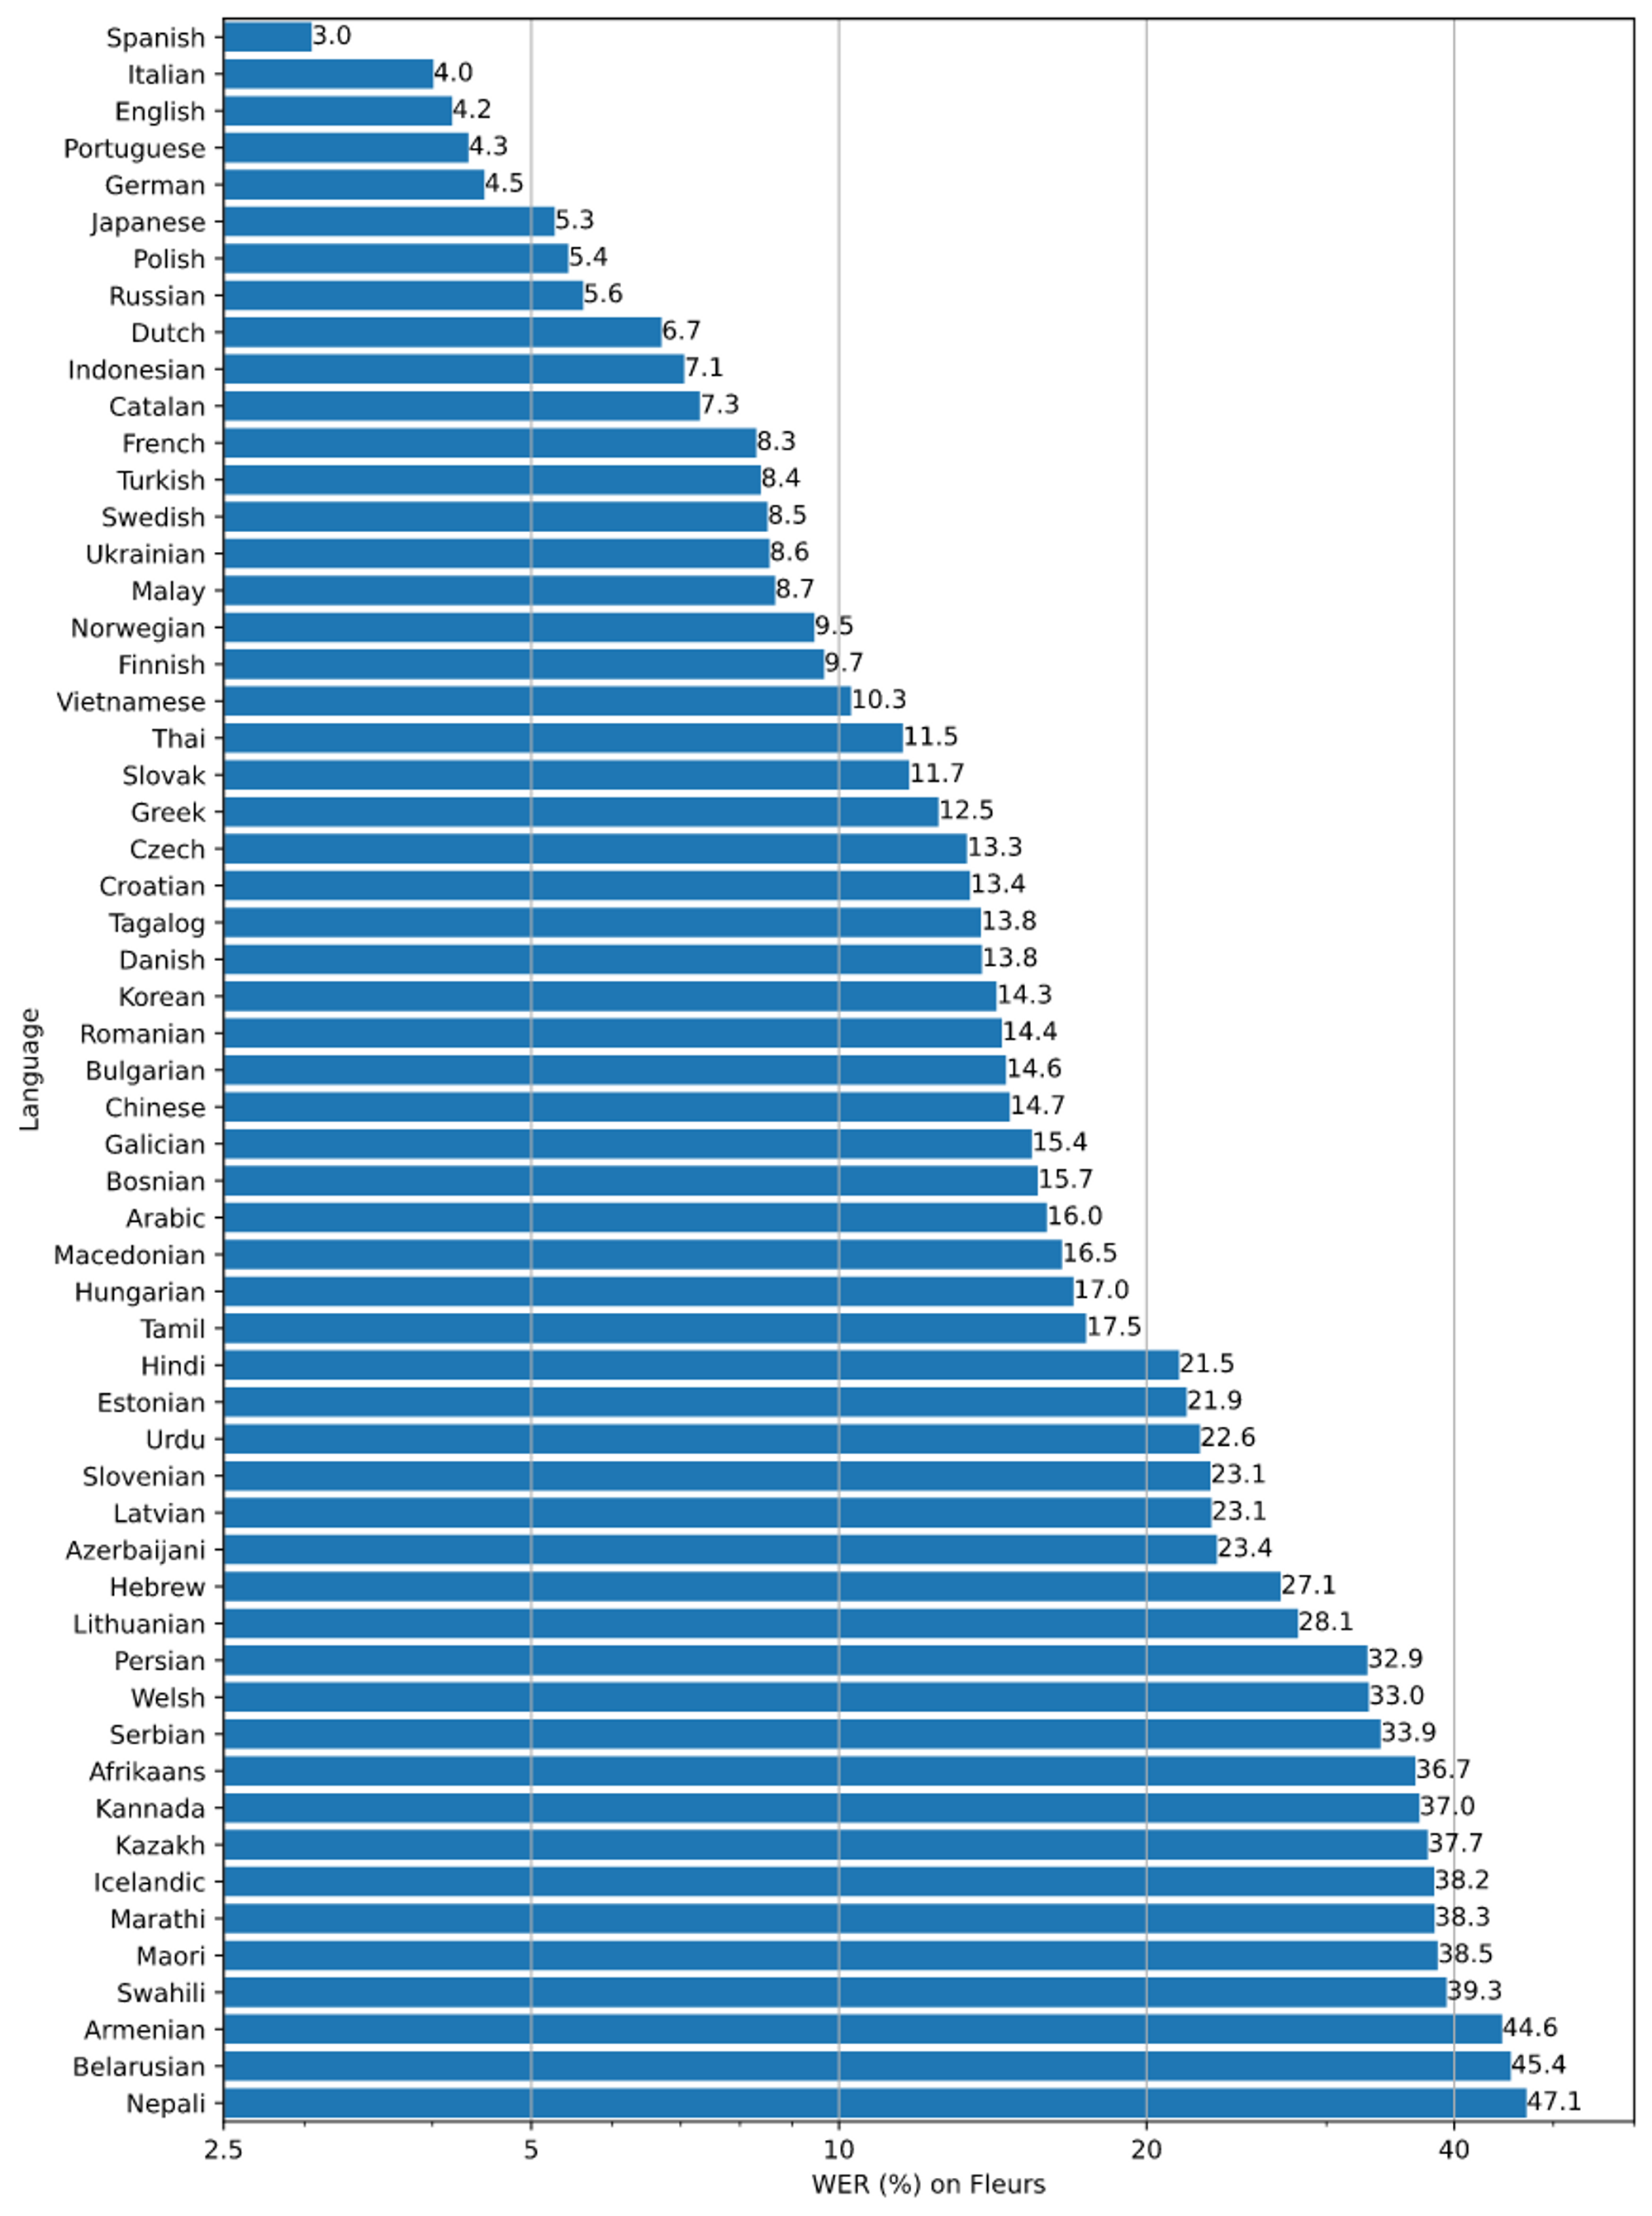

## 效果演示
- 在线测试1：https://whisper-openai.vercel.app/

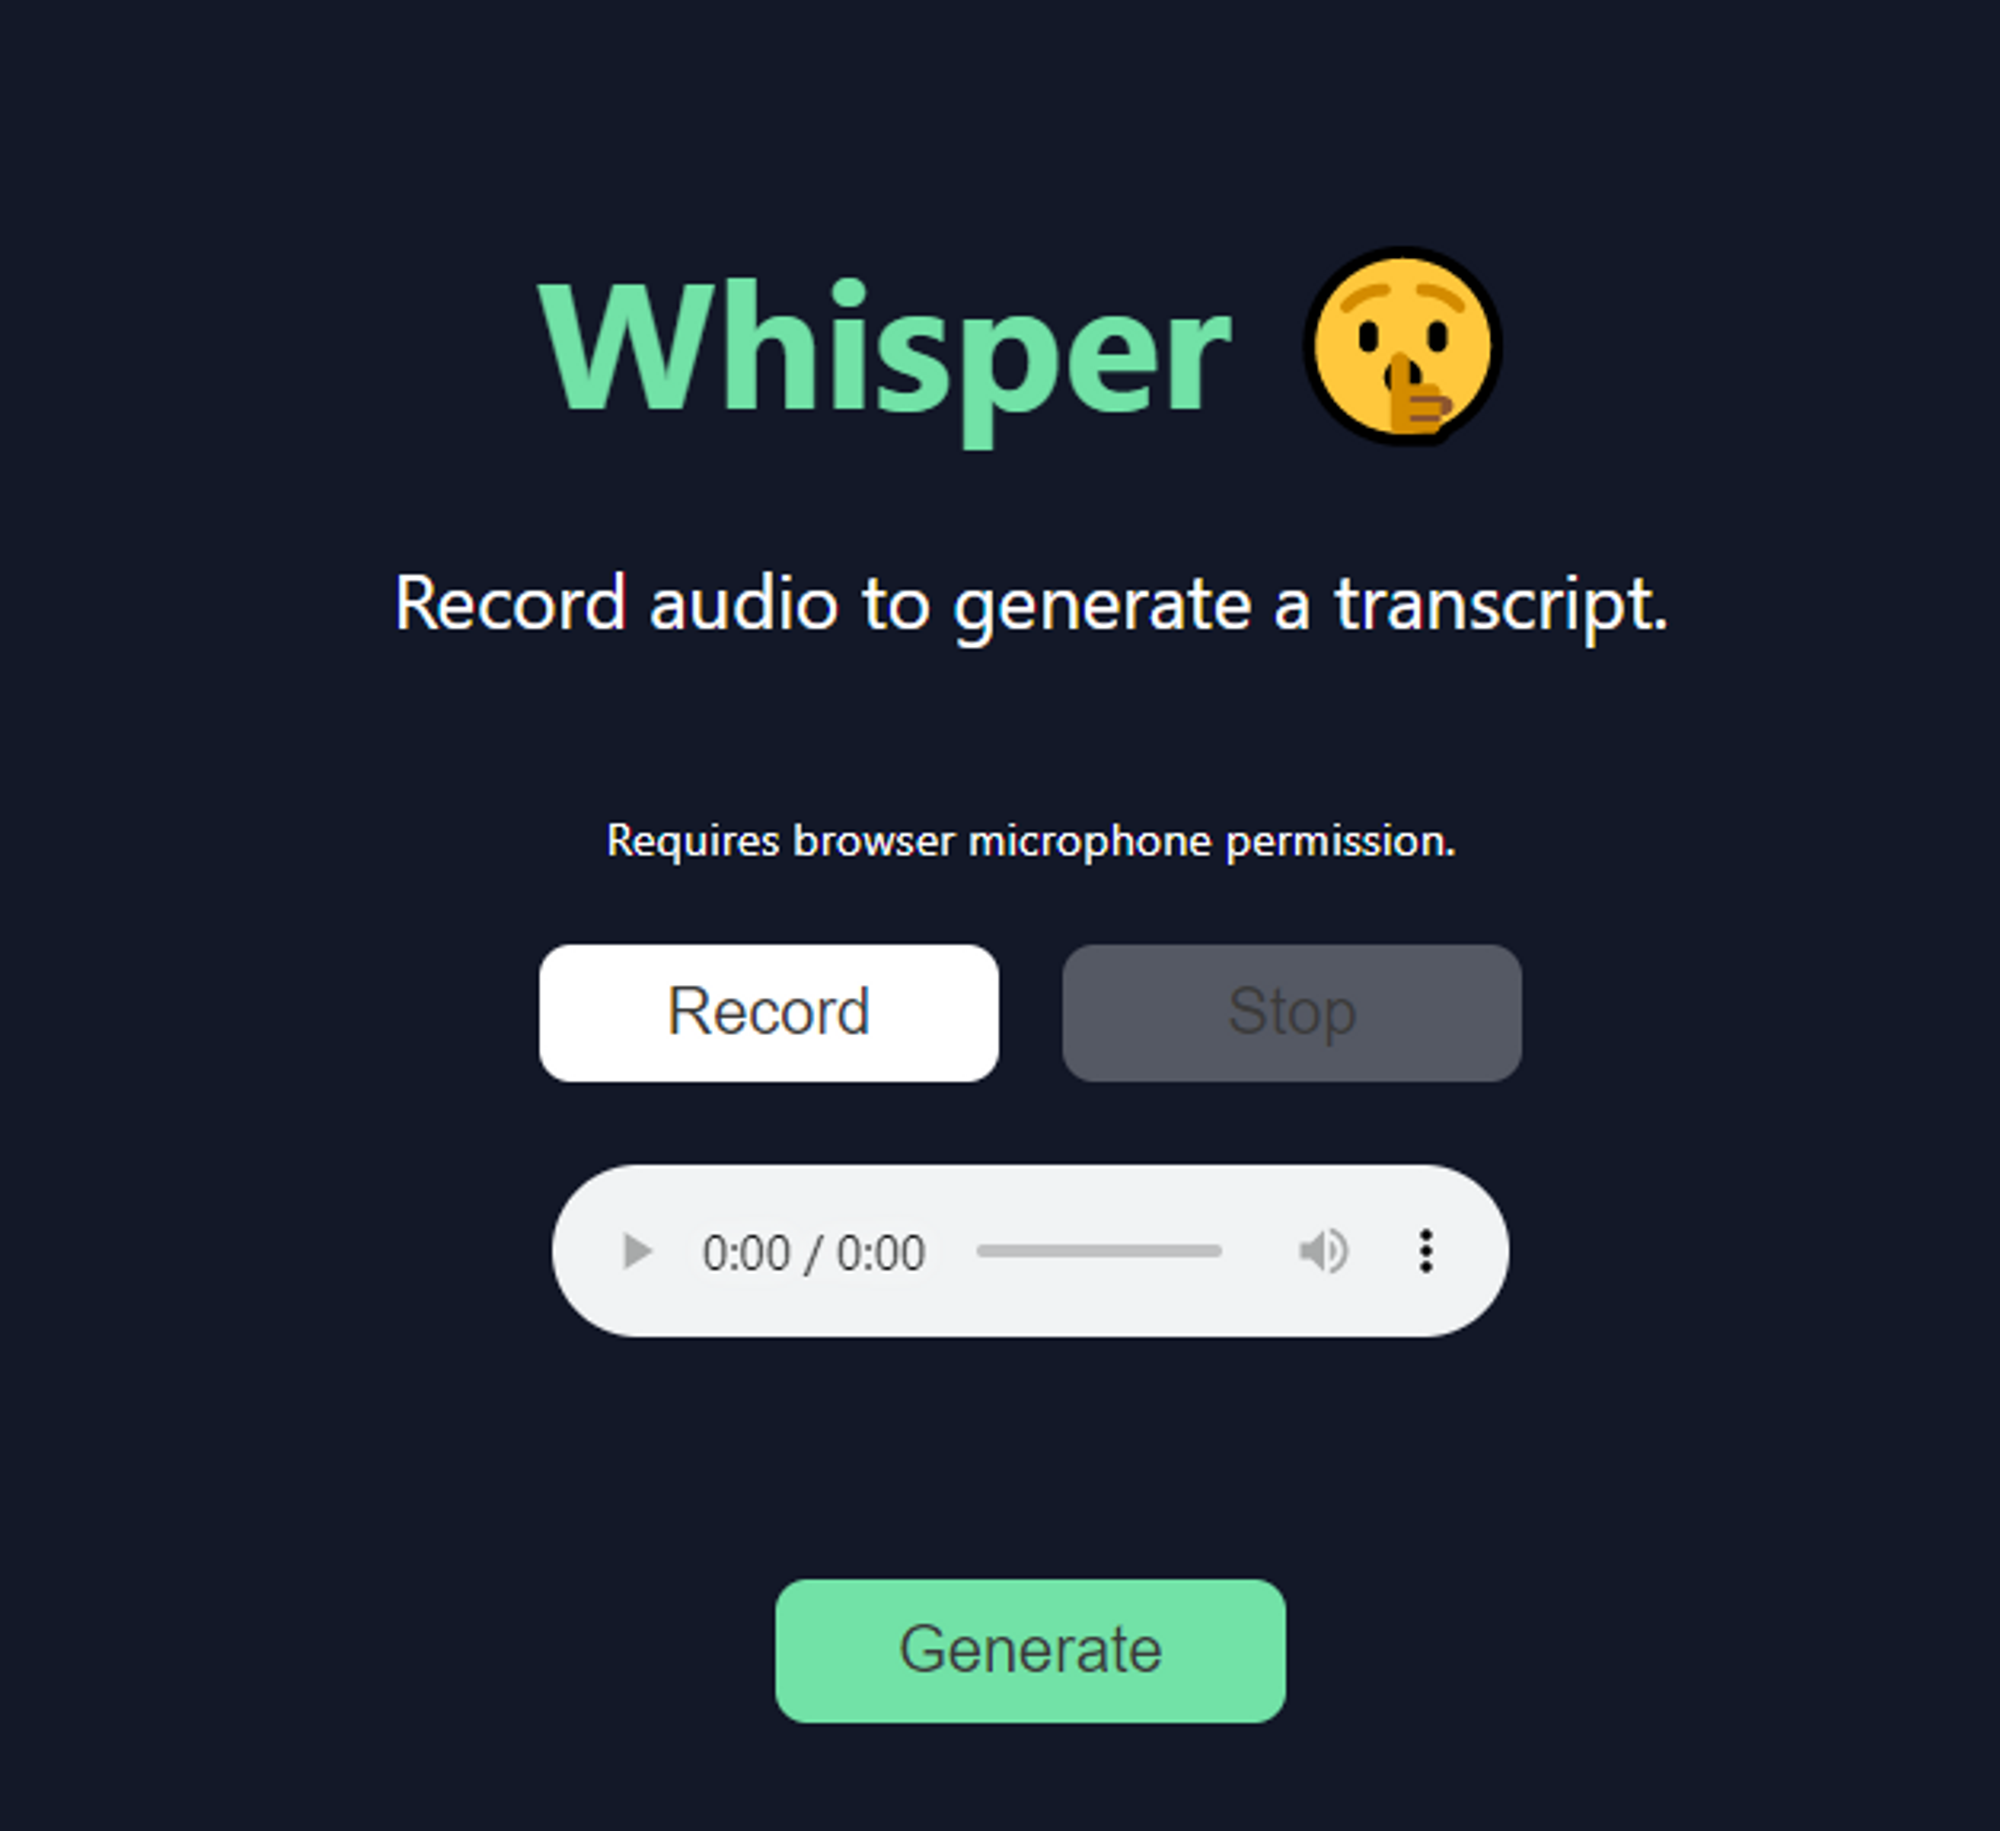

- 在线测试2：https://www.elementx.ai/demo/openai-whisper

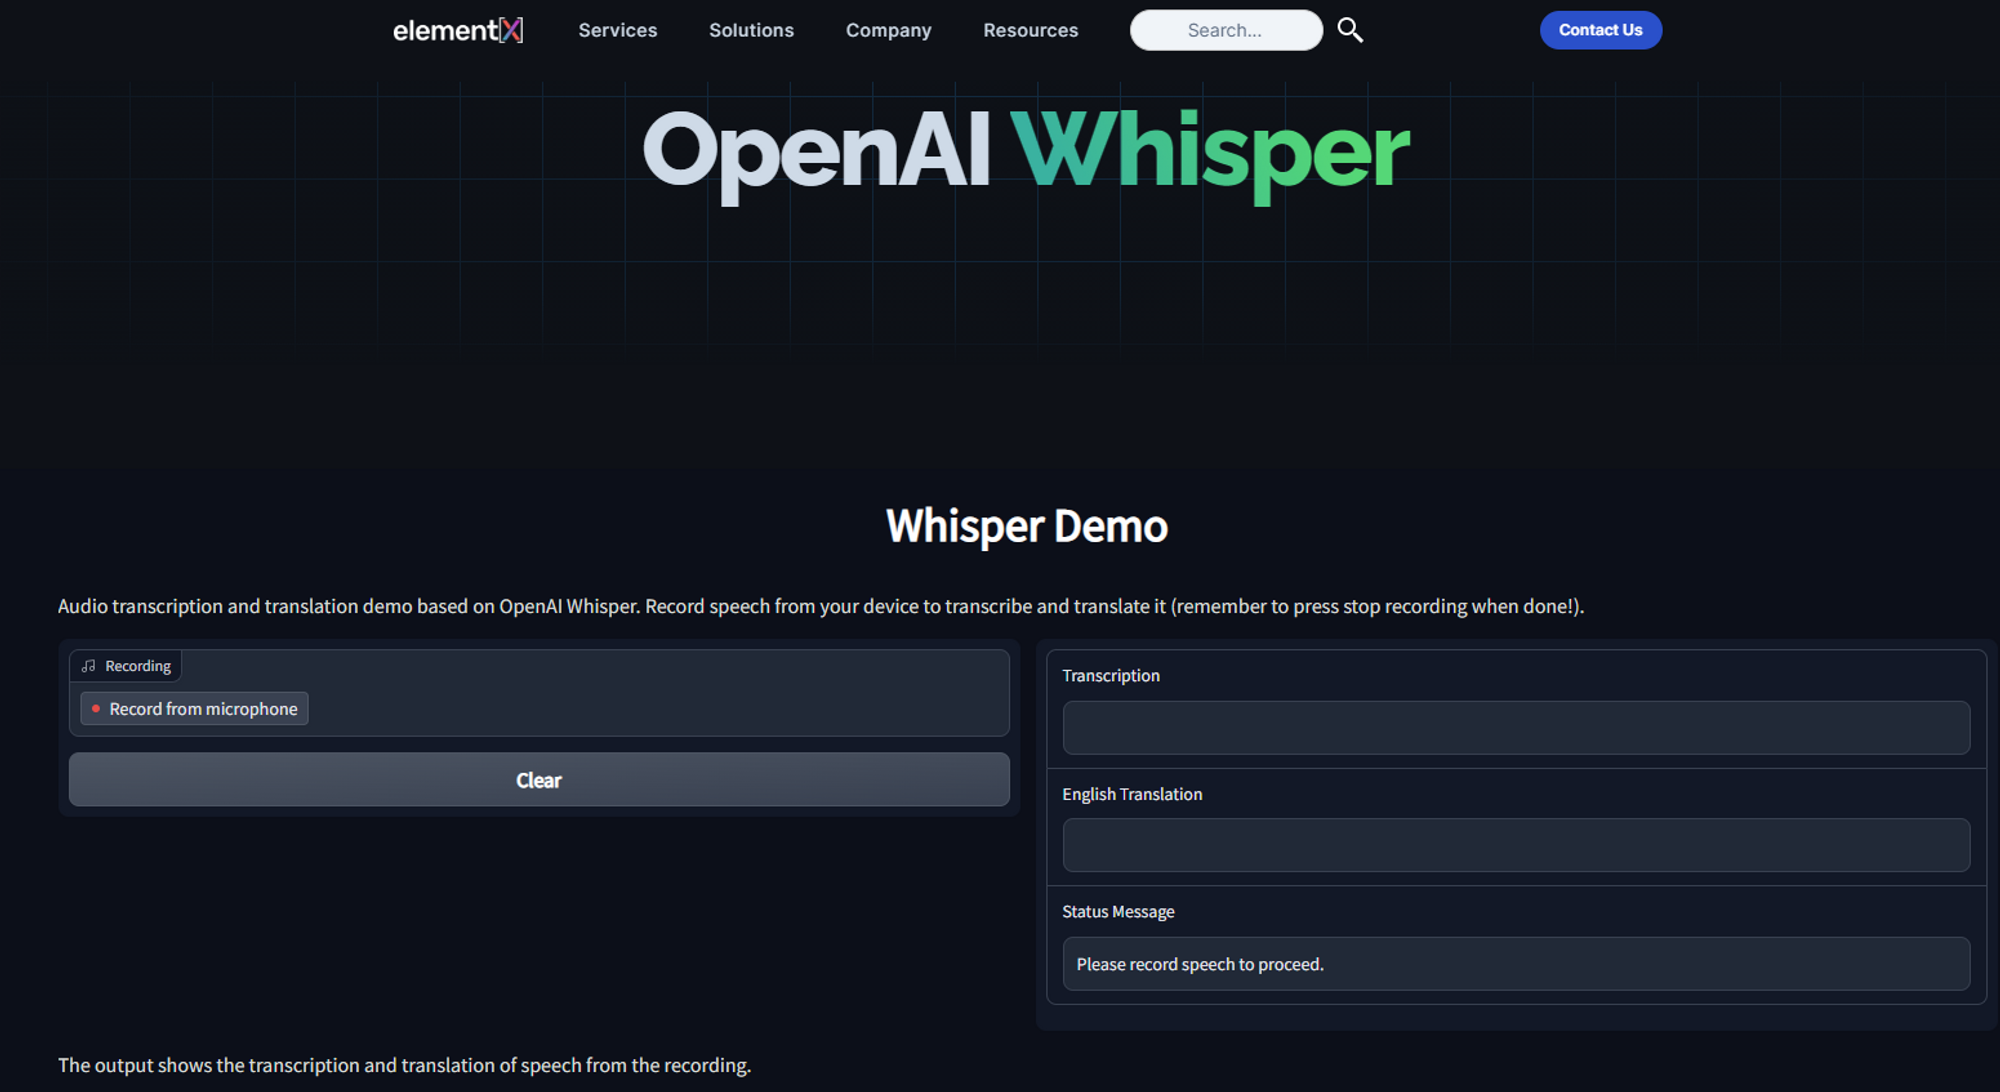

## Code

- 安装依赖

In [ ]:
!pip install -U openai-whisper


# on Ubuntu or Debian
!sudo apt update && sudo apt install ffmpeg

# on Arch Linux
!sudo pacman -S ffmpeg

# on MacOS using Homebrew (https://brew.sh/)
!brew install ffmpeg

!pip install setuptools-rust


- 执行

In [ ]:
import whisper

model = whisper.load_model("base")

# transcribe
result = model.transcribe("data/test_audio.wav")
print(result["text"])

# load audio and pad/trim it to fit 30 seconds
audio = whisper.load_audio("data/test_audio.wav")
audio = whisper.pad_or_trim(audio)

# make log-Mel spectrogram and move to the same device as the model
mel = whisper.log_mel_spectrogram(audio).to(model.device)

# detect the spoken language
_, probs = model.detect_language(mel)
print(f"Detected language: {max(probs, key=probs.get)}")

# decode the audio
options = whisper.DecodingOptions()
result = whisper.decode(model, mel, options)

# print the recognized text
print(result.text)

### colab demo:
https://colab.research.google.com/drive/1lZj_qGF01yYuxdwZglIXdT8We9rMiWoU#scrollTo=GlJGZ_s4Y8LI

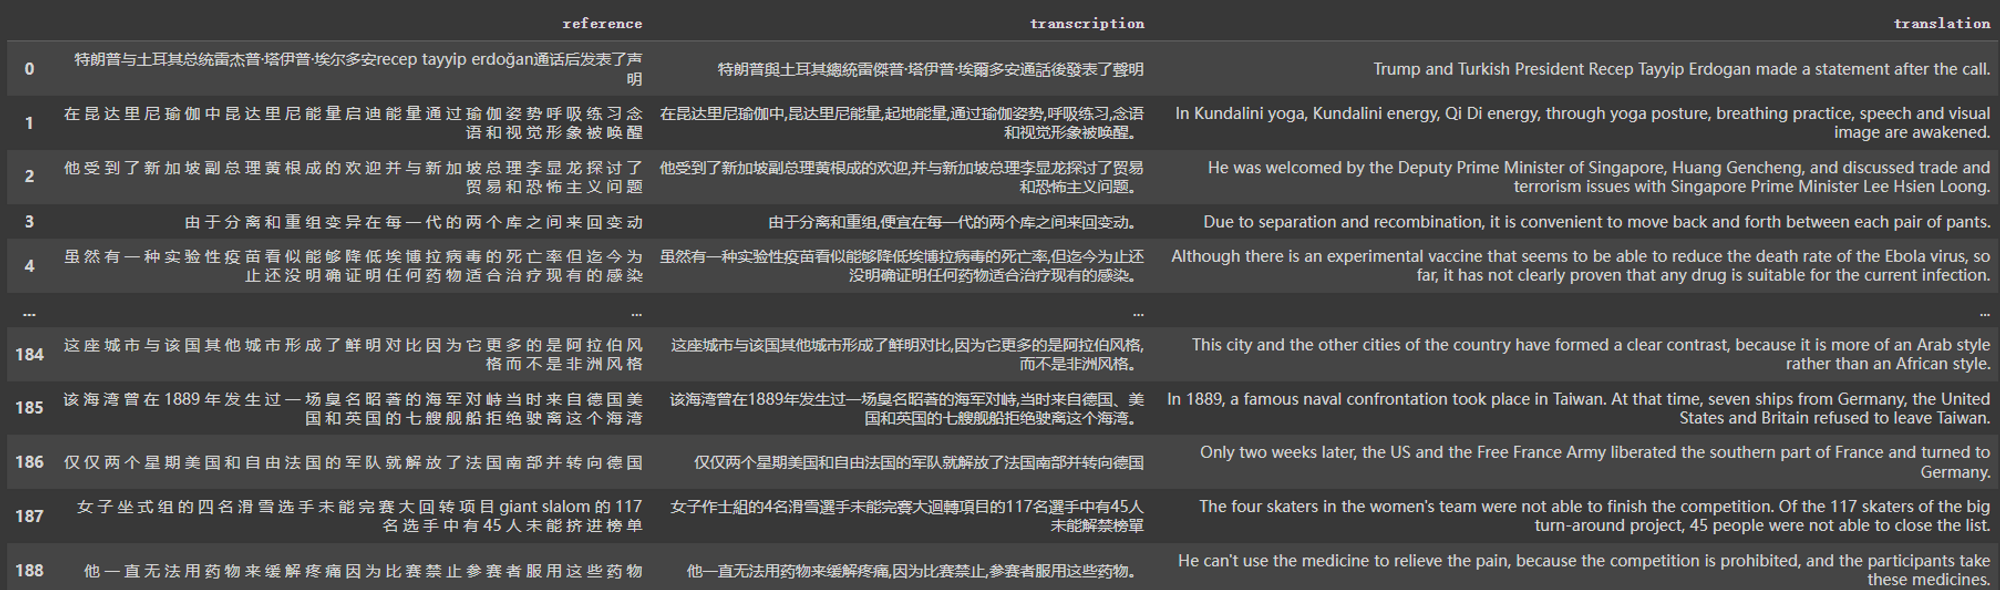